In [11]:
import pandas as pd

file_path = 'evaluate_all.csv'
df = pd.read_csv(file_path)
df = df[(df['pkid']!= 8) & (df['pbid']!= 3)]
df = df[(df['pkid']!= 8) & (df['pbid']!= 1)]
df = df[(df['pkid']!= 8) & (df['pbid']!= 7)]
# df = df[(df['pkid']!= 9) & (df['pbid']!= 2)]
# df = df[(df['pkid']!= 9) & (df['pbid']!= 0)]
# df = df[(df['pkid']!= 9) & (df['pbid']!= 6)]
# df = df[(df['pkid']!= 10) & (df['pbid']!= 4)]
# df = df[(df['pkid']!= 8) ]
# df = df[(df['pkid']!= 9) ]
# df = df[(df['pkid']!= 10)]
# # df = df[(df['pkid']!= 10)]
df

,pkid,pbid,layers,variables,constraints,method,ARG,in_constraints_probs,best_solution_probs,iteration_count
0,0,0,1,6,3,penalty,59.762207,5.468750,1.171875,31
2,0,2,1,6,3,penalty,50.977958,11.132812,4.101562,35
4,0,4,1,6,3,penalty,112.250195,12.304688,0.585938,43
5,0,5,1,6,3,penalty,42.569285,4.101562,1.757812,34
6,0,6,1,6,3,penalty,43.312880,5.566406,1.953125,32
...,...,...,...,...,...,...,...,...,...,...
2962,11,4,7,27,12,HEA,114.194447,0.000000,0.000000,151
2963,11,5,7,27,12,HEA,95.582327,0.000000,0.000000,151
2964,11,6,7,27,12,HEA,99.989168,0.000000,0.000000,151
2966,11,8,7,27,12,HEA,189.046576,0.000000,0.000000,151


In [12]:
drop_index = df[(df['layers'] <4) & (df['best_solution_probs']>95) & (df['method'] != 'commute')].index
df = df[~df.index.isin(drop_index)]

In [13]:
df[(df['layers'] <3) & (df['best_solution_probs']>95) & (df['method'] != 'commute')].index

Index([], dtype='int64')

In [14]:

df = df.drop(columns=['pbid'])

grouped_df = df.groupby(['pkid', 'layers', 'variables', 'constraints', 'method'], as_index=False).agg({
    "ARG": 'mean',
    'in_constraints_probs': 'mean',
    'best_solution_probs': 'mean',
    'iteration_count':'mean'
})
grouped_df

,pkid,layers,variables,constraints,method,ARG,in_constraints_probs,best_solution_probs,iteration_count
0,0,1,6,3,HEA,1.161197,99.930246,0.000000,151.000000
1,0,1,6,3,commute,0.177126,100.000000,71.484375,28.571429
2,0,1,6,3,cyclic,45.787270,24.135045,3.138951,33.857143
3,0,1,6,3,penalty,62.118767,8.607701,1.771763,34.428571
4,0,2,6,3,HEA,7.063147,89.411272,0.000000,151.000000
...,...,...,...,...,...,...,...,...,...
303,11,6,27,12,penalty,157.230584,0.000000,0.000000,118.000000
304,11,7,27,12,HEA,165.096270,0.000000,0.000000,151.000000
305,11,7,27,12,commute,0.135895,100.000000,19.991629,139.000000
306,11,7,27,12,cyclic,43.427192,28.376116,0.000000,133.571429


In [15]:
grouped_df_inlayers = grouped_df[grouped_df['layers']==1]
## 分组并把组作为索引
grouped_df_inlayers.pivot(index =['pkid','layers','variables','constraints'], columns='method', values=["ARG",'in_constraints_probs','best_solution_probs','iteration_count'])

ARG                         \
method                                     HEA   commute       cyclic   
pkid layers variables constraints                                       
0    1      6         3               1.161197  0.177126    45.787270   
1    1      15        8              60.338869  0.265047    77.191068   
2    1      21        12            101.902283  0.359978    92.022893   
3    1      28        15            192.239851  0.590986   111.382153   
4    1      12        6             451.594482  0.087891   187.107178   
5    1      15        9             641.204590  0.371338   589.043213   
6    1      24        12           2308.735910  0.445522   771.457101   
7    1      28        16           2907.453823  0.514230  1163.970633   
9    1      18        9              71.041367  0.194953     0.294024   
10   1      24        11            113.631060  0.222666     0.264253   
11   1      27        12            110.898634  0.146873     0.133457   

                                               in_constraints_probs          \
method                                 penalty                  HEA commute   
pkid layers variables constraints                                             
0    1      6         3              62.118767            99.930246   100.0   
1    1      15        8             153.158853             2.608817   100.0   
2    1      21        12            159.369222             0.000000   100.0   
3    1      28        15            246.365100             0.000000   100.0   
4    1      12        6            1179.410645             0.195312   100.0   
5    1      15        9            1679.955566             0.000000   100.0   
6    1      24        12           2800.864676             0.000000   100.0   
7    1      28        16           3159.073451             0.000000   100.0   
9    1      18        9             116.965750             0.000000   100.0   
10   1      24        11            164.669001             0.000000   100.0   
11   1      27        12            131.568978             0.000000   100.0   

                                                        best_solution_probs  \
method                                 cyclic   penalty                 HEA   
pkid layers variables constraints                                             
0    1      6         3             24.135045  8.607701                 0.0   
1    1      15        8              2.915737  0.111607                 0.0   
2    1      21        12             0.362723  0.000000                 0.0   
3    1      28        15             0.823103  0.000000                 0.0   
4    1      12        6             39.404297  0.000000                 0.0   
5    1      15        9              1.562500  0.000000                 0.0   
6    1      24        12             0.446429  0.041853                 0.0   
7    1      28        16             0.013951  0.000000                 0.0   
9    1      18        9            100.000000  0.181362                 0.0   
10   1      24        11           100.000000  0.000000                 0.0   
11   1      27        12            99.958147  0.000000                 0.0   

                                                                  \
method                               commute    cyclic   penalty   
pkid layers variables constraints                                  
0    1      6         3            71.484375  3.138951  1.771763   
1    1      15        8            46.888951  0.279018  0.000000   
2    1      21        12           14.369420  0.000000  0.000000   
3    1      28        15            3.083147  0.027902  0.000000   
4    1      12        6            82.421875  0.830078  0.000000   
5    1      15        9            25.732422  0.097656  0.000000   
6    1      24        12           18.763951  0.000000  0.000000   
7    1      28        16            1.018415  0.000000  0.000000   
9    1      18        9            30.036272  0.000000  0.

### 层数与精度的灵敏度分析

In [16]:
layer_groups = grouped_df.groupby(['layers','method'],as_index=False).agg({
    "ARG": 'mean',
    'in_constraints_probs': 'mean',
    'best_solution_probs': 'mean',
    'iteration_count':'mean'
})

In [17]:
layer_pivot = layer_groups.pivot(index =['layers'], columns='method', values=["ARG",'in_constraints_probs','best_solution_probs','iteration_count'])

In [18]:
layer_pivot["best_solution_probs"]

method,HEA,commute,cyclic,penalty
layers,,,,
1,0.000000,27.417943,0.397600,0.163606
2,0.017122,38.287591,0.622717,0.501598
3,0.438185,38.389686,1.878509,0.253653
4,0.875101,41.580636,2.469308,0.511744
5,0.388088,38.403637,1.437576,1.250507
6,0.802176,45.370206,2.455991,0.400771
7,0.924564,40.773387,3.352019,0.725446


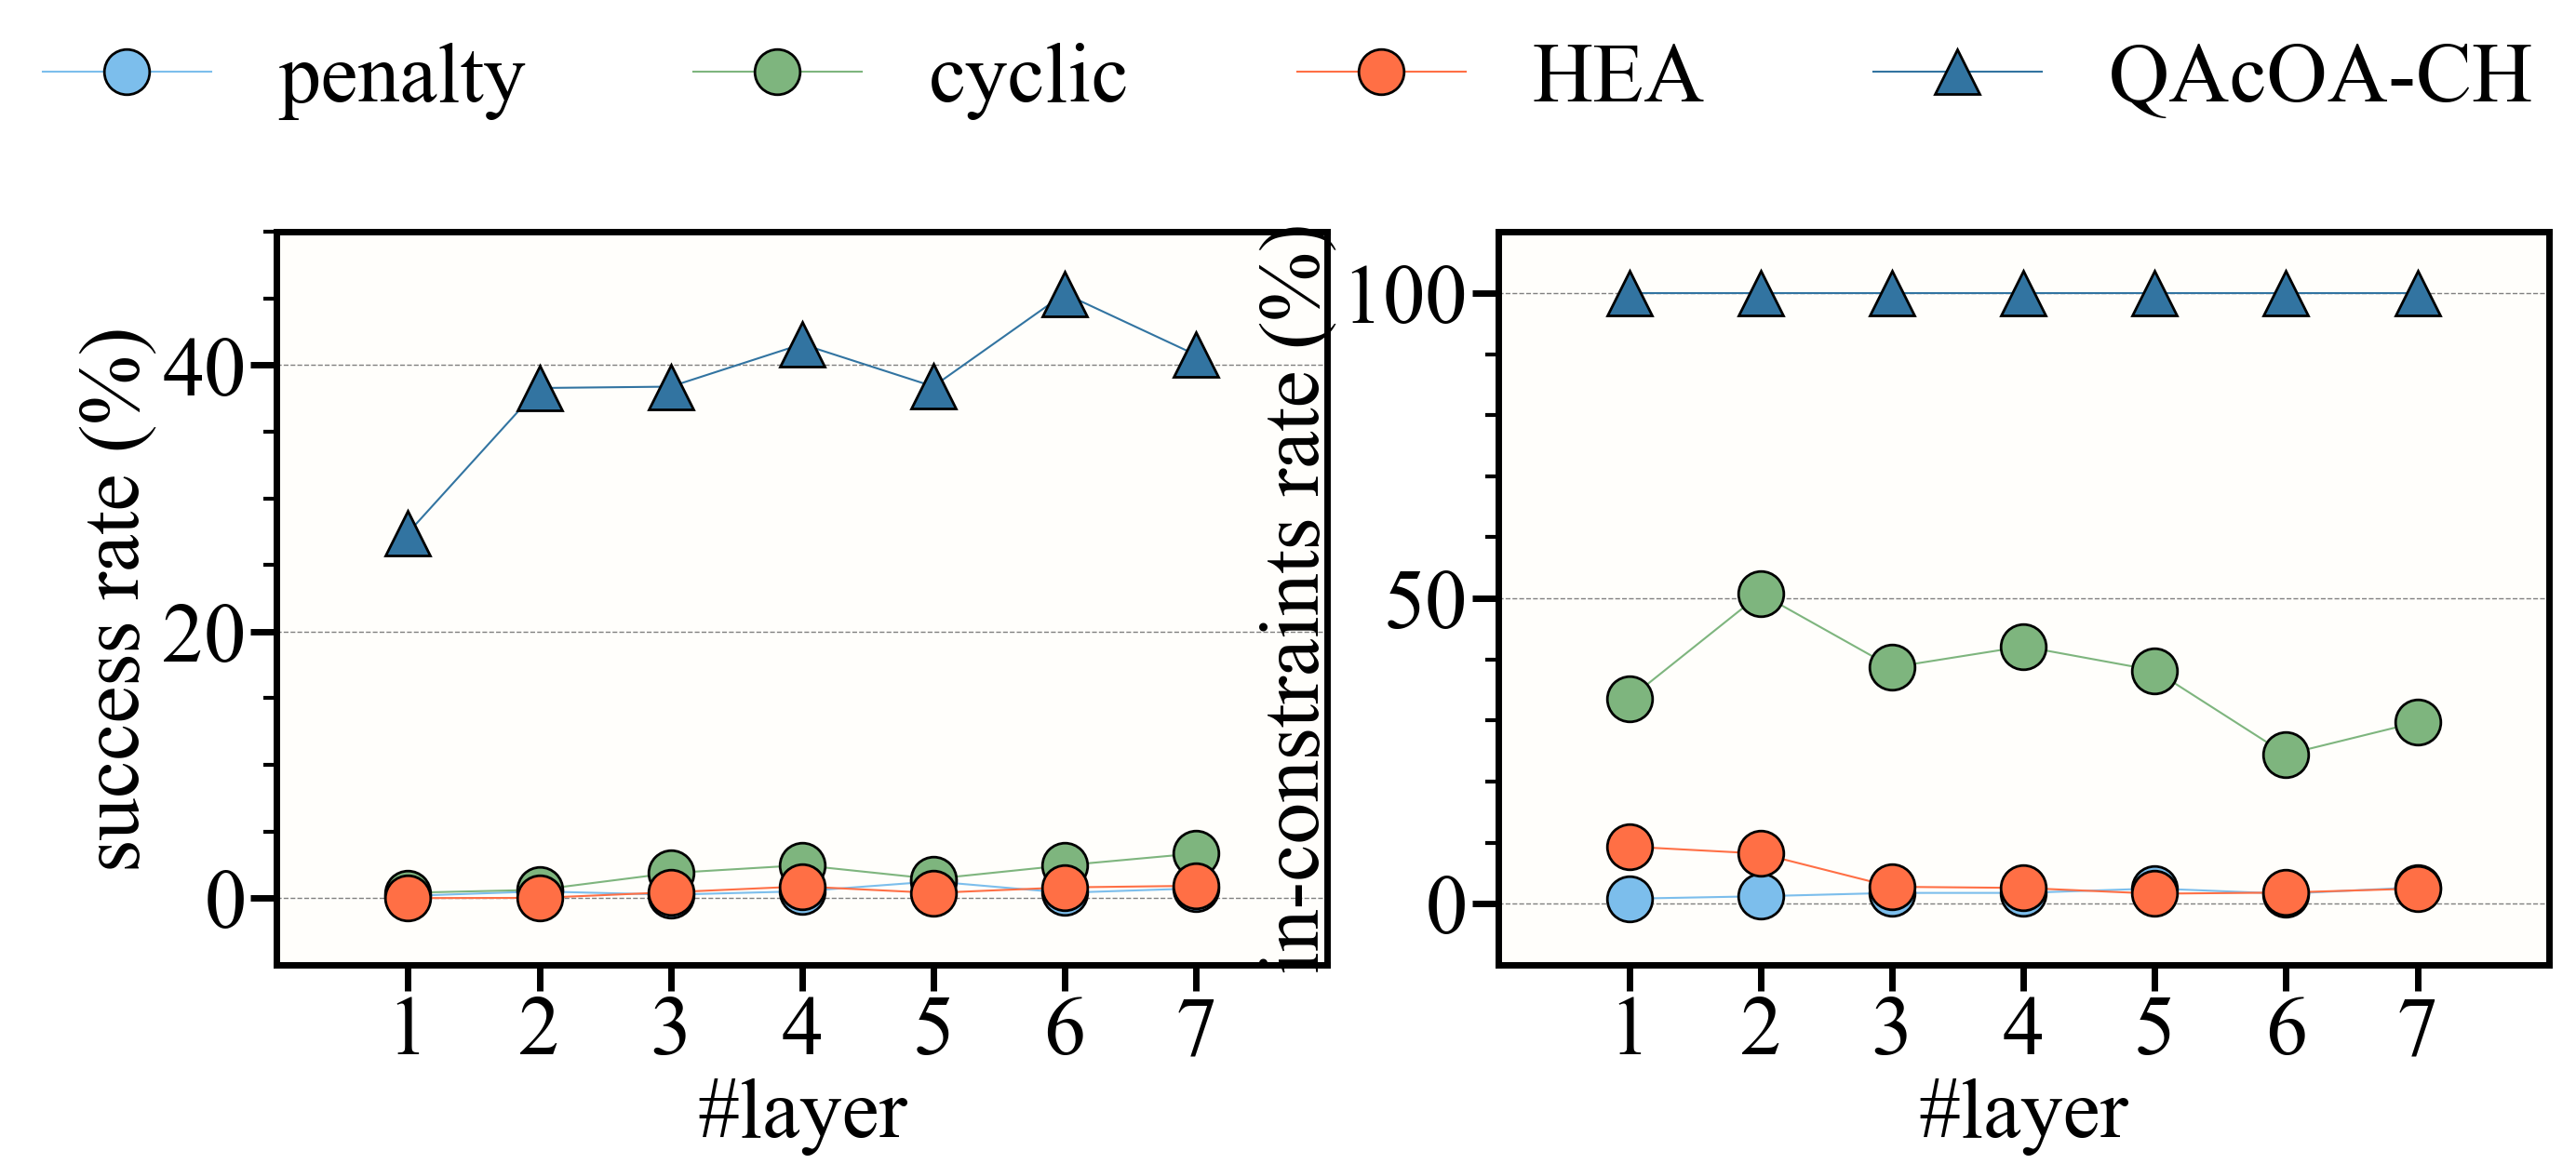

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


scale = 1.05
fig= plt.figure(figsize=(25*scale, 7.5*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 65,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 10,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 2,
    "markers.fillstyle" :  'full',
    'lines.markeredgecolor': 'black',
})
bar_width =  0.2
colors = ["#7CBEEC", "#7EB57E", "#FF6F45", "#3274A1"]
labels = ['success rate (%)', 'in-constraints rate (%)']
for i, metric in enumerate( ["best_solution_probs",'in_constraints_probs']):
    axes = plt.axes([0+i*0.5, 0, 0.43, 1])
    ylabel = labels[i]
    layers = layer_pivot.index.values

    ymetric = metric# best_solution_probs
    axes.plot(layers,layer_pivot[ymetric]['penalty'], marker="o", 
            label="penalty", color=colors[0])
    axes.plot(layers,layer_pivot[ymetric]['cyclic'], marker="o", 
            label="cyclic", color=colors[1])
    axes.plot(layers,layer_pivot[ymetric]['HEA'].astype(float), marker="o", 
            label="HEA", color=colors[2])
    axes.plot(layers,layer_pivot[ymetric]['commute'], marker="^",
            label="QAcOA-CH", color=colors[3])

#     axes.set_yscale("log")
    # axes.set_yticks([1, 100, 10000, 1000000])
    # prob_lab = [prob + str(idx) for prob in ["F", "G", "K"] for idx in range(1, 6)]
    axes.tick_params(axis="x", which="major", width=5, length=20)
    axes.set_xticks(range(1,len(layers)+1))
    axes.set_xticklabels(layers)
    if i == 0:
        axes.set_ylim(-5,50)
        axes.set_yticks(range(0,55,5), minor=True)
        axes.set_yticks(range(0,55,20), minor=False)
        # axes.set_yscale("log")
    else:
        axes.set_ylim(-10,110)
        axes.set_yticks(range(0,101,10), minor=True)
        axes.set_yticks(range(0,101,50), minor=False)
#     axes.set_yticks(range(0,101,20), minor=False)
    
    # axes.set_xticklabels([prob_lab[idx] for idx in mean_commute.variables])
    axes.grid(axis="y", color="gray", linestyle="--", linewidth=1)
    ### set bakground color
    axes.set_facecolor("#fffef877")
    # axes.set_title("Comparison of QAcOA-CH with other algorithms")
    axes.set_xlabel("#layer")
    axes.set_ylabel(ylabel)
    axes.set_xlim(0.0, 8)
    # axes.set_yscale("log")
axes.legend(frameon=False, bbox_to_anchor=(-0.2, 1.05), loc='lower center', ncol=4)
plt.savefig("layer_comparison.svg", bbox_inches="tight")

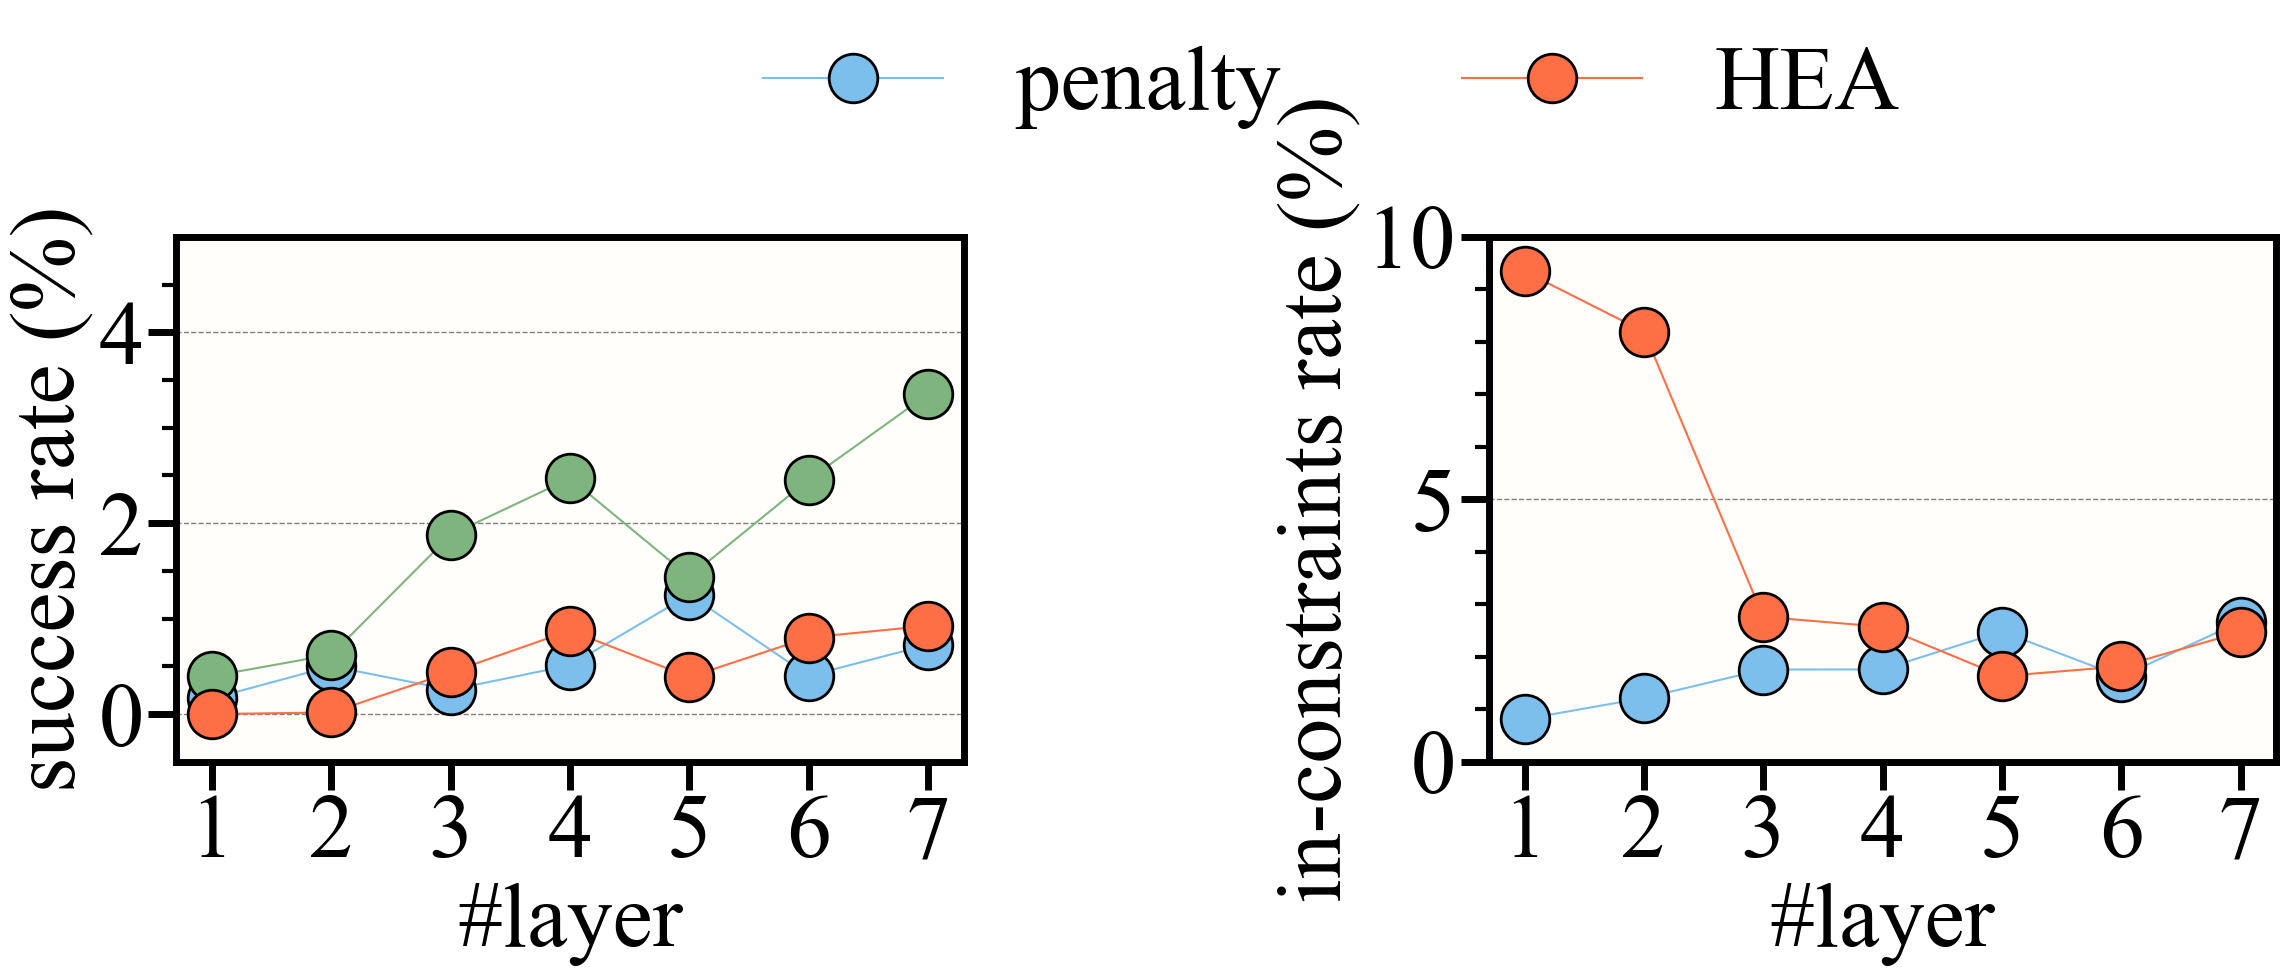

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


scale = 1.05
fig= plt.figure(figsize=(25*scale, 5*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 65,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 10,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 2,
    "markers.fillstyle" :  'full',
    'lines.markeredgecolor': 'black',
})
bar_width =  0.2
colors = ["#7CBEEC", "#7EB57E", "#FF6F45", "#3274A1"]
labels = ['success rate (%)', 'in-constraints rate (%)']
for i, metric in enumerate( ["best_solution_probs",'in_constraints_probs']):
    axes = plt.axes([0+i*0.5, 0, 0.30, 1])
    ylabel = labels[i]
    layers = layer_pivot.index.values

    ymetric = metric# best_solution_probs
    # axes.plot(layers,layer_pivot[ymetric]['commute'], marker="^",
    #         label="QAcOA-CH", color=colors[3])

#     axes.set_yscale("log")
    # axes.set_yticks([1, 100, 10000, 1000000])
    # prob_lab = [prob + str(idx) for prob in ["F", "G", "K"] for idx in range(1, 6)]
    axes.tick_params(axis="x", which="major", width=5, length=20)
    axes.set_xticks(range(1,len(layers)+1))
    axes.set_xticklabels(layers)
    if i == 0:
        axes.plot(layers,layer_pivot[ymetric]['penalty'], marker="o", 
                label="penalty", color=colors[0])
        axes.plot(layers,layer_pivot[ymetric]['cyclic'], marker="o", 
                label="cyclic", color=colors[1])
        axes.plot(layers,layer_pivot[ymetric]['HEA'].astype(float), marker="o", 
                label="HEA", color=colors[2])
        axes.set_ylim(-0.5,5)
        axes.set_yticks(range(0,5,2), minor=False)
        axes.set_yticks([x/4 for x in range(0,20,2)], minor=True)
        # axes.set_yscale("log")
    else:
        axes.plot(layers,layer_pivot[ymetric]['penalty'], marker="o", 
                label="penalty", color=colors[0])
        axes.plot(layers,layer_pivot[ymetric]['HEA'].astype(float), marker="o", 
                label="HEA", color=colors[2])
        # axes.set_ylim(-1,11)
        axes.set_yticks(range(0,11,5), minor=False)
        axes.set_yticks([x/4 for x in range(0,40,4)], minor=True)
#     axes.set_yticks(range(0,101,20), minor=False)
    
    # axes.set_xticklabels([prob_lab[idx] for idx in mean_commute.variables])
    axes.grid(axis="y", color="gray", linestyle="--", linewidth=1)
    ### set bakground color
    axes.set_facecolor("#fffef877")
    # axes.set_title("Comparison of QAcOA-CH with other algorithms")
    axes.set_xlabel("#layer")
    axes.set_ylabel(ylabel)
    # axes.set_yscale("log")
axes.legend(frameon=False, bbox_to_anchor=(-0.2, 1.05), loc='lower center', ncol=4)
plt.savefig("layer_comparison.svg", bbox_inches="tight")